In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def_df = pd.read_csv('Resources/defunciones_corte18abril.csv', parse_dates=['fec_defuncion'])
def_df.rename(columns={'fec_defuncion':'Date'},inplace=True)
def_df.head()

/home/uriel/.local/share/virtualenvs/cdmx-covid-analysis-OOKfBqux/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,edad,sexo,Date,estado,causa,causa_registro,alcaldia,LugarMuerte,num_consecutivo
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523


In [3]:
def_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420527 entries, 0 to 420526
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   edad             420362 non-null  float64       
 1   sexo             420527 non-null  object        
 2   Date             420527 non-null  datetime64[ns]
 3   estado           414125 non-null  object        
 4   causa            420527 non-null  object        
 5   causa_registro   190998 non-null  object        
 6   alcaldia         277049 non-null  object        
 7   LugarMuerte      168882 non-null  object        
 8   num_consecutivo  420527 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 28.9+ MB


In [8]:
gender_grouped = def_df.groupby('sexo')
gender_df =  pd.DataFrame(gender_grouped['Date'].count())
gender_df.rename(columns={'Date':'count'},inplace=True)
gender_df['Percentage'] = gender_df['count']/gender_df['count'].sum()
gender_df.head()

,count,Percentage
sexo,,
Hombre,231548,0.550614
Indefinido,128,0.000304
Mujer,188851,0.449082


In [5]:
def_df['Month'] = def_df['Date'].dt.month
def_df['Weekday'] = def_df['Date'].dt.weekday
def_df['Day'] = def_df['Date'].dt.dayofyear
def_df['Year'] = def_df['Date'].dt.year
def_df.head()

,edad,sexo,Date,estado,causa,causa_registro,alcaldia,LugarMuerte,num_consecutivo,Month,Weekday,Day,Year
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527,4,5,100,2021
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526,4,5,100,2021
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525,4,5,100,2021
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524,4,5,100,2021
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523,4,5,100,2021


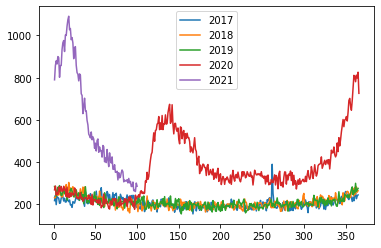

In [6]:
month_grouped = def_df.groupby(['Year','Day']).count().reset_index().set_index('Year')

for index in month_grouped.index.unique():
    temp = month_grouped[['Date','Day']].loc[index]
    plt.plot(temp['Day'],temp['Date'],label = index)
plt.legend()
plt.savefig('Images/dethsByYear.png', bbox_inches='tight')
